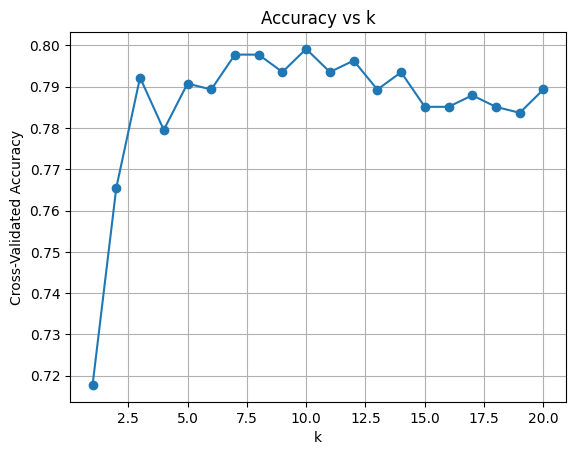

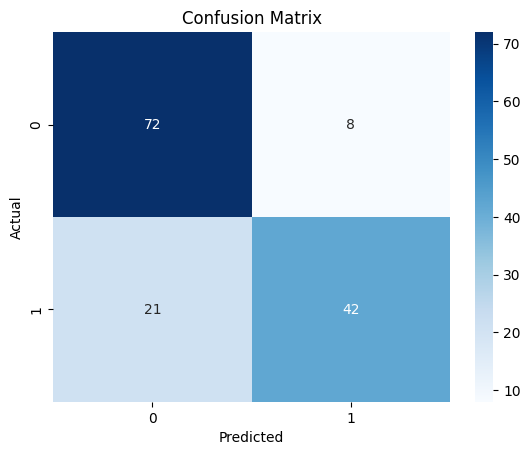

Best k: 10
Accuracy: 0.7972
Confusion Matrix:
 [[72  8]
 [21 42]]


In [2]:
# Titanic Dataset - k-NN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Titanic_Train.csv")

# Preprocessing
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df.dropna(inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Accuracy vs k
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    accuracies.append(scores.mean())

plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Final Model with optimal k
best_k = k_range[np.argmax(accuracies)]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
print(f"Best k: {best_k}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", cm)
